In [2]:
!pip install tensorflow
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#Importing necessary libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


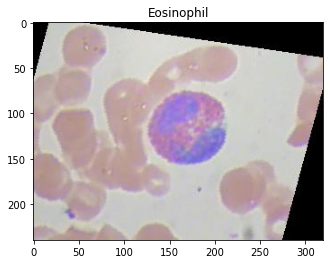

In [8]:
img = cv2.imread("/content/drive/My Drive/Blood_cell_image_dataset/images/TRAIN/EOSINOPHIL/_0_1169.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB )
plt.title("Eosinophil")
plt.imshow(img)

In [9]:
img_width = 64
img_height = 64

In [10]:
datagen = ImageDataGenerator(rescale = 1/255.0, validation_split = 0.2)

In [11]:
train_data_generator = datagen.flow_from_directory(directory="/content/drive/My Drive/Blood_cell_image_dataset/images/TRAIN/", target_size = (img_width, img_height), color_mode="rgb", class_mode="categorical", batch_size = 16, shuffle=True ,subset = "training")

Found 960 images belonging to 4 classes.


In [12]:
validation_data_generator = datagen.flow_from_directory(directory="/content/drive/My Drive/Blood_cell_image_dataset/images/TRAIN/", target_size = (img_width, img_height),  color_mode="rgb", class_mode="categorical", batch_size = 16, shuffle=True, subset = "validation")


Found 240 images belonging to 4 classes.


In [13]:
train_data_generator.next()[1]

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [21]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(64,64,3), activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Conv2D(16, (3,3), activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(128, activation="relu"))

model.add(Dense(4, activation="softmax"))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 16)        

In [23]:
model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [24]:
my_callback = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)]

In [25]:
history=model.fit(train_data_generator, steps_per_epoch=len(train_data_generator), epochs=25, validation_data=validation_data_generator, validation_steps = len(validation_data_generator), callbacks=my_callback)


Epoch 1/25
60/60 [==============================] - 10s 145ms/step - loss: 1.3950 - accuracy: 0.2552 - val_loss: 1.3862 - val_accuracy: 0.2542
Epoch 2/25
60/60 [==============================] - 9s 146ms/step - loss: 1.3867 - accuracy: 0.2479 - val_loss: 1.3859 - val_accuracy: 0.2500
Epoch 3/25
60/60 [==============================] - 10s 165ms/step - loss: 1.3864 - accuracy: 0.2750 - val_loss: 1.3854 - val_accuracy: 0.2542
Epoch 4/25
60/60 [==============================] - 8s 131ms/step - loss: 1.3846 - accuracy: 0.2885 - val_loss: 1.3857 - val_accuracy: 0.2083
Epoch 5/25
60/60 [==============================] - 10s 164ms/step - loss: 1.3811 - accuracy: 0.2698 - val_loss: 1.3814 - val_accuracy: 0.3292
Epoch 6/25
60/60 [==============================] - 10s 174ms/step - loss: 1.3560 - accuracy: 0.3250 - val_loss: 1.3374 - val_accuracy: 0.3792
Epoch 7/25
60/60 [==============================] - 10s 156ms/step - loss: 1.3046 - accuracy: 0.4010 - val_loss: 1.3264 - val_accuracy: 0.3958
E

In [26]:
datagen_test = ImageDataGenerator(rescale = 1/255.0)
test_data_generator = datagen.flow_from_directory(directory="/content/drive/My Drive/Blood_cell_image_dataset/images/TEST/", target_size = (img_width, img_height), color_mode="rgb", class_mode="categorical", batch_size = 16, subset = "training")

Found 59 images belonging to 4 classes.


In [27]:
model.evaluate(test_data_generator)

4/4 [==============================] - 9s 3s/step - loss: 1.2032 - accuracy: 0.3898


[1.2032442092895508, 0.38983049988746643]

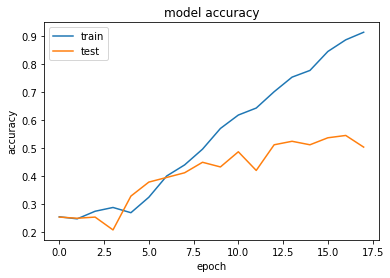

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

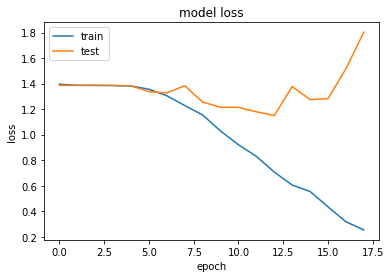

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
# Getting the predicted classes from one hot encoded predicted outputs

x,y = test_data_generator.next()
pred_array=[]
max_index_arr = []
for i in range(10):
    img = x[i]
    img = img.reshape(-1,64,64,3)
    pred_val = model.predict(img)
    max_idx = np.argmax(pred_val)
    pred_array.append(max_idx)

1/1 [==============================] - 0s 29ms/step


In [31]:
#Making the Output meaningful using named classes

cell_dict = {0:"EOSINOPHIL", 1:"LYMPHOCYTE", 2:"MONOCYTE", 3:"NEUTROPHIL"}
predictions = {}
actual_val = {}

k=0
for arr in y[:10]:
    actual_val[k] = cell_dict[np.argmax(arr)]
    k+=1

k=0
for pred in pred_array:
    predictions[k] = cell_dict[pred]
    k+=1
    
print("ACTUAL:", actual_val)
print("PREDICTIONS:", predictions)

ACTUAL: {0: 'NEUTROPHIL', 1: 'NEUTROPHIL', 2: 'NEUTROPHIL', 3: 'NEUTROPHIL', 4: 'NEUTROPHIL', 5: 'EOSINOPHIL', 6: 'NEUTROPHIL', 7: 'NEUTROPHIL', 8: 'LYMPHOCYTE', 9: 'EOSINOPHIL'}
PREDICTIONS: {0: 'MONOCYTE', 1: 'LYMPHOCYTE', 2: 'NEUTROPHIL', 3: 'NEUTROPHIL', 4: 'NEUTROPHIL', 5: 'LYMPHOCYTE', 6: 'NEUTROPHIL', 7: 'MONOCYTE', 8: 'LYMPHOCYTE', 9: 'NEUTROPHIL'}


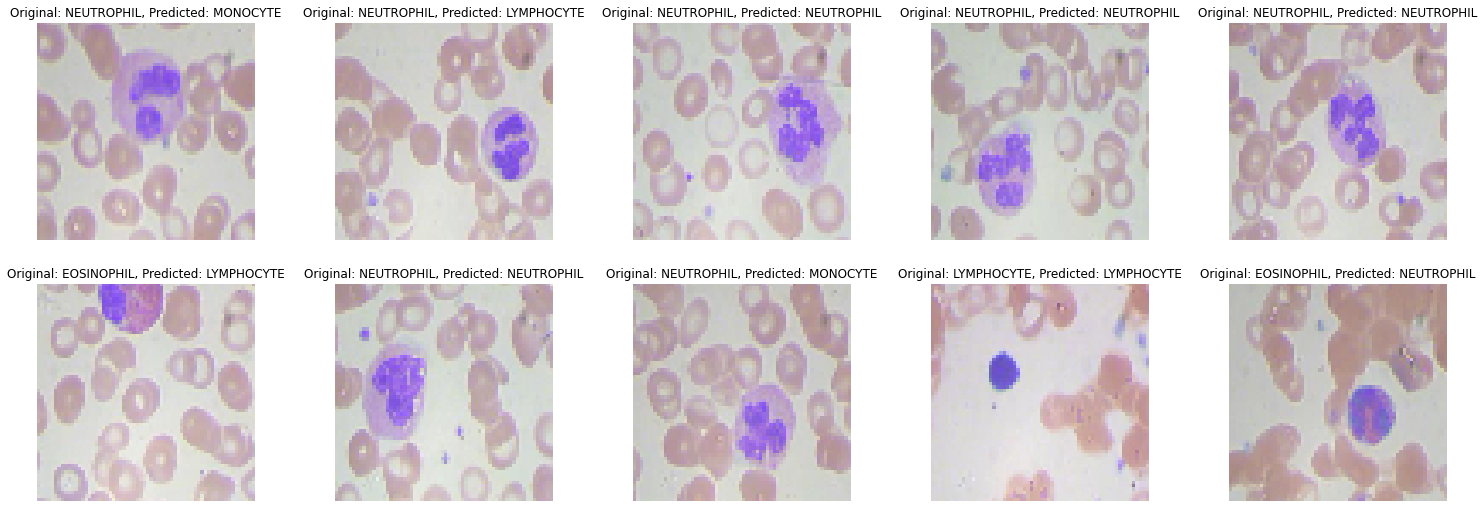

In [32]:
plt.figure(figsize = (20,20))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.imshow(x[i])
    plt.title('Original: {}, Predicted: {}'.format(actual_val[i], predictions[i]))
    plt.axis('Off')

plt.subplots_adjust(left=1.5, right=2.5, top=1)
plt.show()